#### Remarque : 
    
#####  "TEST"     "C'est le même modèle appliqué après un changement effectué sur une variable ou après la création d'une autre."

# Introduction 

#### Le présent rapport a pour objectif de présenter notre participation à un data challenge portant sur la prédiction de la réussite des étudiants au baccalauréat en France. Ce défi reposait sur l'exploitation de données variées, telles que la date et le lieu de naissance de l'étudiant, le centre d'examen, l'établissement scolaire, et d'autres variables, afin de construire un modèle de machine learning efficace pour anticiper les résultats de l'examen.
#### Notre démarche s'est appuyée sur une analyse minutieuse des données, incluant des étapes de préparation, de traitement et de visualisation de données, ainsi que l'utilisation d'algorithmes de machine learning adaptés. Nous avons également évalué la performance de notre modèle en utilisant des métriques d'évaluation adaptées, avant d'interpréter les résultats obtenus.
#### Ce rapport présente les différentes étapes de notre démarche, ainsi que les résultats obtenus

### Importation des bibliothèques nécessaires

In [157]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import random
from datetime import datetime
from dateutil import parser
import random
from sklearn.preprocessing import LabelEncoder



### chargement des donnees 

In [16]:
data_train=pd.read_csv("C:\\Users\\USER\\Desktop\\datachallange\\train_set.csv", encoding='utf-8')
data_test=pd.read_csv("C:\\Users\\USER\\Desktop\\datachallange\\test_set.csv",sep=';')

In [17]:
data_train.head(1)

,Unnamed: 0,Nom,"Serie,x",GroupeAnonymat,LieuNaissance,Centre,Etablissement,moyeneGeneral,Decision,Note1,...,Note3,Note4,Note5,Note6,Note7,Note8,Willaya,moughataa,DateNaissance,ID
0,27634,El Ide Brahim M'Hadi,SN,SN09,Bathet meit,Lycée Jedida,Lycée Jedida,4.601562,Ajourné,1.625,...,5.0,5.5,3.0,7.75,7.5,18.5,Nouakchott 2 (Ouest),KSAR,12 ديسمبر 1998,ID_27634


In [18]:
data_test.head(1)

,Unnamed: 0,Nom,"Serie,x",GroupeAnonymat,LieuNaissance,Centre,Etablissement,Willaya,moughataa,DateNaissance,ID,prediction
0,6,Mohamed Hama Ahmed Lely,SN,SN09,Vassala,Lycée Vassala,Lycée Vassala,Hod Charghy,BASSEKNOU,15 يوليو 2001,ID_6,NaN


# 1. PHASE D'EXPLORATION 

## Objectif:
- Comprendre du mieux possible nos donnees
- Developper une premiere strategie de modelisation

## Checklist de base 
#### Annalyse de Forme: 
- **Variable target**: "Decision"
- **Lignes et colonnes**: 23894 \ 21
- **Types de variables**: qualitatives:11 et quantitatives:10
- **Analyse des valeurs manquantes** : pas des valeurs manquantes dans notre dataset 

#### Analyse de Fond:
- **Visualisation de la target**: 
   - Ajourné                                  :18966 
   - Admis                                    :1973
   - Sessionnaire                             :1530 
   - Abscent                                  :1068
   - Examen annulé à cause du Téléphone       :351
   - Examen annulé à cause du comportement    :6
   
   

- **Signification des variables**:
- **Relation variables/target**:

## Analyse de la Forme des donnees 

### Copie de data train 

In [164]:
datatrain=data_train.copy()

#### Lignes/colonnes

In [165]:
datatrain.shape

(23894, 21)

#### Types variables

In [166]:
datatrain.dtypes.value_counts()

object     11
float64     9
int64       1
dtype: int64

<AxesSubplot:ylabel='None'>

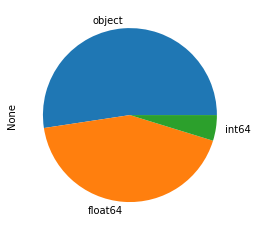

In [167]:
datatrain.dtypes.value_counts().plot.pie()

#### Valeurs manquantes 

In [168]:
datatrain.isna().sum()

Unnamed: 0        0
Nom               0
Serie,x           0
GroupeAnonymat    0
LieuNaissance     0
Centre            0
Etablissement     0
moyeneGeneral     0
Decision          0
Note1             0
Note2             0
Note3             0
Note4             0
Note5             0
Note6             0
Note7             0
Note8             0
Willaya           0
moughataa         0
DateNaissance     0
ID                0
dtype: int64

##### pas de valeurs manquantes dans data train 

<AxesSubplot:>

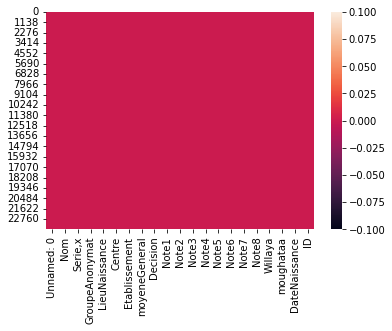

In [169]:
sns.heatmap(datatrain.isna())

##### La variable target contient 6 modalites:

<AxesSubplot:ylabel='Decision'>

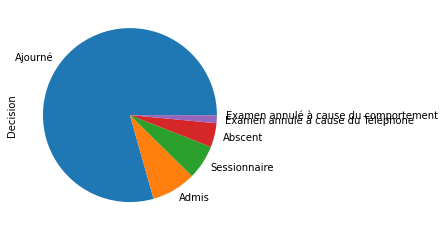

In [175]:
datatrain['Decision'].value_counts().plot.pie()

### Copie de data test 

In [170]:
datatest=data_test.copy()

In [172]:
datatest.shape

(15930, 12)

<AxesSubplot:ylabel='None'>

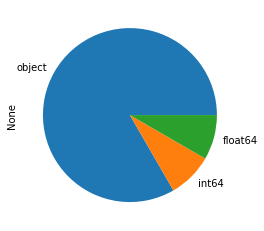

In [173]:
datatest.dtypes.value_counts().plot.pie()

##### pas des valeurs manquantes dans data test 


<AxesSubplot:>

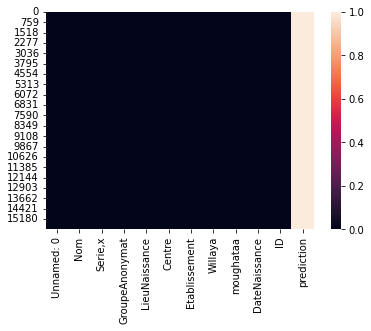

In [174]:
sns.heatmap(datatest.isna())

# 2. PHASE DE PRE-TRAITEMENT 

#### Copie de dataset

In [96]:
df_train=data_train.copy()


In [97]:
df_test=data_test.copy()

In [98]:
df_train = df_train.drop(['Unnamed: 0','Note1','Note2','Note3','Note4','Note5','Note6','Note7','Note8','moyeneGeneral'], axis=1)
df_train.head()

,Nom,"Serie,x",GroupeAnonymat,LieuNaissance,Centre,Etablissement,Decision,Willaya,moughataa,DateNaissance,ID
0,El Ide Brahim M'Hadi,SN,SN09,Bathet meit,Lycée Jedida,Lycée Jedida,Ajourné,Nouakchott 2 (Ouest),KSAR,12 ديسمبر 1998,ID_27634
1,Mariem Yedaly Afane,LO,LO1,Beir Taouress,Lycée Arafat 2 (A),Lycée Arafat 2,Ajourné,Nouakchott 3 (Sud),ARAFAT,26 ديسمبر 1991,ID_36311
2,Aiche Jiyid Jiyid,LM,LM3,Akjoujt,Lycée Akjoujt,Lycée Akjoujt,Ajourné,Inchiri,AKJOUJT,8 مايو 1995,ID_21059
3,Ahmed Abd El Ghader Meissa,SN,SN06,Chelkhet Tiyab,Lycée Toujounine 1,Lycée Toujounine 1,Ajourné,Nouakchott 1 (Nord),TOUJOUNINE,24 avr. 1999,ID_24532
4,Mariam Abdoulaye Ba,SN,SN03,Aere M'Bar,Lycée Nouadhibou 2,Lycée Wava Nouadhibou,Ajourné,Dakhlet NDB,NOUADHIBOU,10 mai 2001,ID_17861


In [99]:
df_test = df_test.drop(['Unnamed: 0','prediction'], axis=1)
df_test.head()

,Nom,"Serie,x",GroupeAnonymat,LieuNaissance,Centre,Etablissement,Willaya,moughataa,DateNaissance,ID
0,Mohamed Hama Ahmed Lely,SN,SN09,Vassala,Lycée Vassala,Lycée Vassala,Hod Charghy,BASSEKNOU,15 يوليو 2001,ID_6
1,Fatimatou Mohamed Sid Abbe,SN,SN09,Vassala,Lycée Vassala,Lycée Vassala,Hod Charghy,BASSEKNOU,12 août 1999,ID_15
2,El Alye Cheikh Ahmed Maihmatt,SN,SN09,Vassala,Lycée Vassala,Lycée Vassala,Hod Charghy,BASSEKNOU,18 sept. 1999,ID_18
3,Haine Mohamed Lemin Telba,SN,SN09,Vassala,Lycée Vassala,Lycée Vassala,Hod Charghy,BASSEKNOU,24 août 1998,ID_19
4,Aichata Sid'Ahmed Ahmed Ely,SN,SN09,El Megve,Lycée Vassala,Lycée Vassala,Hod Charghy,BASSEKNOU,31-mai-95,ID_20


In [100]:
sub=pd.read_csv('C:\\Users\\USER\\Desktop\\datachallange\\submission_template.csv')
sub.head()

,Id,Predicted
0,ID_12,NaN
1,ID_14,NaN
2,ID_15,NaN
3,ID_22,NaN
4,ID_23,NaN


In [101]:
df_train =df_train.rename(columns={'ID': 'Id'})


In [102]:
df_test=df_test.rename(columns={'ID': 'Id'})

In [103]:
train=df_train.copy()

In [104]:
test=df_test.copy()

In [105]:
ids = sub[~sub['Id'].isin(test['Id'])]['Id']
rows = train[train['Id'].isin(ids)]
test = test.append(rows)
test= pd.merge(test, sub[['Id']], on='Id', how='inner')

In [106]:
ids = sub[~sub['Id'].isin(test['Id'])]['Id']
rows = train[train['Id'].isin(ids)]
test = test.append(rows)
test= pd.merge(test, sub[['Id']], on='Id', how='inner')

In [107]:
test=test.drop(['Decision'],axis=1)

In [108]:
# so we have trainset and testset

In [109]:
train.head(1)

,Nom,"Serie,x",GroupeAnonymat,LieuNaissance,Centre,Etablissement,Decision,Willaya,moughataa,DateNaissance,Id
0,El Ide Brahim M'Hadi,SN,SN09,Bathet meit,Lycée Jedida,Lycée Jedida,Ajourné,Nouakchott 2 (Ouest),KSAR,12 ديسمبر 1998,ID_27634


In [110]:
test.head(1)

,Nom,"Serie,x",GroupeAnonymat,LieuNaissance,Centre,Etablissement,Willaya,moughataa,DateNaissance,Id
0,Fatimatou Mohamed Sid Abbe,SN,SN09,Vassala,Lycée Vassala,Lycée Vassala,Hod Charghy,BASSEKNOU,12 août 1999,ID_15


#### modifer les mois en arabe : Colonne DateNaissance

In [ ]:
# pour trainset 

In [113]:
remplacements= {'janv.' : 'Jan',
'févr.' : 'Feb',
'mars' : 'Mar',
'avr.' : 'Apr',
'mai' : 'May',
'juin' : 'Jun',
'juil.' : 'Jul',
'août' : 'Aug',
'sept.' : 'Sep',
'oct.' : 'Oct',
'nov.' : 'Nov',
'déc.' : 'Dec'}

# remplacements = {"يناير": 'janv.',
#               "فبراير": 'févr.',
#               "مارس": 'mars',
#               'أبريل': 'avr.',
#               "مايو": 'mai',
#               'يونيو': 'juin',
#               'يوليو': 'juil.',
#               'أغسطس': 'août',
#               'سبتمبر': 'sept.',
#               'أكتوبر': 'oct.',
#               'نوفمبر': 'nov.',
#               "ديسمبر": 'déc.'}


# Remplacer les mois incorrects par les mois corrects
train['DateNaissance'] = train['DateNaissance'].replace(remplacements, regex=True)

In [51]:
# pour test set 

In [116]:
remplacements= {'janv.' : 'Jan',
'févr.' : 'Feb',
'mars' : 'Mar',
'avr.' : 'Apr',
'mai' : 'May',
'juin' : 'Jun',
'juil.' : 'Jul',
'août' : 'Aug',
'sept.' : 'Sep',
'oct.' : 'Oct',
'nov.' : 'Nov',
'déc.' : 'Dec'}

# remplacements = {"يناير": 'janv.',
#               "فبراير": 'févr.',
#               "مارس": 'mars',
#               'أبريل': 'avr.',
#               "مايو": 'mai',
#               'يونيو': 'juin',
#               'يوليو': 'juil.',
#               'أغسطس': 'août',
#               'سبتمبر': 'sept.',
#               'أكتوبر': 'oct.',
#               'نوفمبر': 'nov.',
#               "ديسمبر": 'déc.'}


# Remplacer les mois incorrects par les mois corrects
test['DateNaissance'] = test['DateNaissance'].replace(remplacements, regex=True)

In [117]:
def convert_date_format(date_str):
    try:
        # Essayer de parser la date avec la bibliothèque dateutil
        date = parser.parse(date_str, dayfirst=True)
        # Convertir la date en format "28-jun-2003"
        return date.strftime('%d-%b-%Y').lower()
    except:
        # Si la date ne peut pas être parsée avec dateutil, la laisser telle quelle
        return date_str.lower()


test["DateNaissance"] = test["DateNaissance"].apply(convert_date_format)


In [ ]:
# d=list()
# for i, row in test.iterrows():
#     mois_str = row['DateNaissance'].split(' ')[0]
#     d.append(mois_str)
# unique_values = set(d)

# for value in unique_values:
#     print(value) 

#### Définir une fonction pour vérifier et corriger la date de naissance

In [118]:
def check_and_fix_date(date_str):
    try:
        date = datetime.strptime(date_str, "%d-%b-%Y")
    except ValueError:
        # La date n'est pas dans le bon format
        date_parts = date_str.split("-")
        # Vérifier si la date contient les trois parties
        if len(date_parts) != 3:
            # Si la date ne contient pas les trois parties, retourner NaN
            return pd.NaT
        # Corriger le jour ou le mois manquant avec une valeur aléatoire entre 1 et 31/12
        day = int(date_parts[0]) if date_parts[0] else random.randint(1, 31)
        month = datetime.strptime(date_parts[1], "%b").month if date_parts[1] else random.randint(1, 12)
        year = int(date_parts[2]) if date_parts[2] else random.randint(1900, 2022)
        # Construire la date corrigée
        try:
            date = datetime(year=year, month=month, day=day)
        except ValueError:
            # Si la date est toujours invalide, retourner NaN
            return pd.NaT
    return date

# Appliquer la fonction à la colonne "DateNaissance" de la dataframe
test["DateNaissance"] = test["DateNaissance"].apply(check_and_fix_date)

In [119]:
train.head(1)

,Nom,"Serie,x",GroupeAnonymat,LieuNaissance,Centre,Etablissement,Decision,Willaya,moughataa,DateNaissance,Id
0,El Ide Brahim M'Hadi,SN,SN09,Bathet meit,Lycée Jedida,Lycée Jedida,Ajourné,Nouakchott 2 (Ouest),KSAR,12 Dec 1998,ID_27634


In [120]:
test.head(1)

,Nom,"Serie,x",GroupeAnonymat,LieuNaissance,Centre,Etablissement,Willaya,moughataa,DateNaissance,Id
0,Fatimatou Mohamed Sid Abbe,SN,SN09,Vassala,Lycée Vassala,Lycée Vassala,Hod Charghy,BASSEKNOU,1999-08-12,ID_15


### La creation d'une nouvelle variable "age"

In [121]:
# Définir la date à laquelle nous voulons calculer l'âge
year_to_calculate = 2021

# Définir une fonction pour calculer l'âge à partir d'une date de naissance
def calculate_age(dob_str):
    dob = datetime.strptime(dob_str, '%d %b %Y')
    now = datetime.now()
    age = year_to_calculate - dob.year
    if dob.month > now.month or (dob.month == now.month and dob.day > now.day):
        age -= 1
    return age

# Ajouter une colonne "Age" à la dataframe train, calculée en appliquant la fonction calculate_age à chaque date de naissance
train["Age"] = train["DateNaissance"].apply(calculate_age)

In [122]:
train.head(1)

,Nom,"Serie,x",GroupeAnonymat,LieuNaissance,Centre,Etablissement,Decision,Willaya,moughataa,DateNaissance,Id,Age
0,El Ide Brahim M'Hadi,SN,SN09,Bathet meit,Lycée Jedida,Lycée Jedida,Ajourné,Nouakchott 2 (Ouest),KSAR,12 Dec 1998,ID_27634,22


In [124]:
# Définir la date à laquelle nous voulons calculer l'âge
year_to_calculate = 2021

# Définir une fonction pour calculer l'âge à partir d'une date de naissance
def calculate_age(dob_str):
    dob = dob_str.to_pydatetime()
    age = year_to_calculate - dob.year
    if dob.month > datetime.now().month or (dob.month == datetime.now().month and dob.day > datetime.now().day):
        age -= 1
    return age

# Ajouter une colonne "Age" à la dataframe test, calculée en appliquant la fonction calculate_age à chaque date de naissance
test['DateNaissance'] = pd.to_datetime(test['DateNaissance'], errors='coerce') # Convertir les objets Timestamp en chaînes de caractères
test['DateNaissance'] = test['DateNaissance'].dt.strftime('%d-%b-%Y') # Convertir les objets Timestamp en chaînes de caractères
test['DateNaissance'] =test['DateNaissance'].apply(lambda x: datetime.strptime(x, '%d-%b-%Y') if pd.notnull(x) else None) # Convertir les chaînes de caractères en objets datetime
test['DateNaissance'] = test['DateNaissance'].apply(lambda x: x.replace(day=random.raandint(1,28)) if x and pd.isnull(x.day) else x) # Remplacer le jour manquant par une valeur aléatoire entre 1 et 28
test['DateNaissance'] = test['DateNaissance'].apply(lambda x: x.replace(month=random.randint(1,12)) if x and pd.isnull(x.month) else x) # Remplacer le mois manquant par une valeur aléatoire entre 1 et 12
test['DateNaissance'] = test['DateNaissance'].apply(lambda x: x.replace(year=random.randint(1900,year_to_calculate-1)) if x and pd.isnull(x.year) else x) # Remplacer l'année manquante par une valeur aléatoire entre 1900 et l'année à calculer moins un an
test["Age"] = test["DateNaissance"].apply(calculate_age)

In [125]:
test.head(1)

,Nom,"Serie,x",GroupeAnonymat,LieuNaissance,Centre,Etablissement,Willaya,moughataa,DateNaissance,Id,Age
0,Fatimatou Mohamed Sid Abbe,SN,SN09,Vassala,Lycée Vassala,Lycée Vassala,Hod Charghy,BASSEKNOU,1999-08-12,ID_15,21


In [149]:
train=train.drop(['DateNaissance'],axis=1)

In [140]:
test=test.drop(['DateNaissance'],axis=1)

In [150]:
d_train=train.copy()

In [142]:
d_test=test.copy()

In [151]:
d_train['Decision'] = d_train['Decision'].apply (lambda x: 1 if x == 'Admis' else x==0)

#### Encoder les variables Categorielles 

In [152]:
le = LabelEncoder ()
# Encode categorical variables
le = LabelEncoder ()
d_train["Nom"]=le.fit_transform(d_train["Nom"])
d_train["Serie,x"]=le.fit_transform(d_train["Serie,x"])
d_train["GroupeAnonymat"] = le.fit_transform(d_train["GroupeAnonymat"])
d_train["LieuNaissance"] = le.fit_transform(d_train["LieuNaissance"])
d_train["Centre"] = le.fit_transform(d_train["Centre"])
d_train["Etablissement"]=le.fit_transform(d_train["Etablissement"])
d_train["Willaya"]=le.fit_transform(d_train["Willaya"])
d_train["moughataa"] = le.fit_transform(d_train["moughataa"])
d_train["Decision"]=le.fit_transform(d_train["Decision"])
X_train = d_train.drop(['Decision','Id'], axis=1)
y_train = d_train["Decision"]


In [153]:
X_train.head(1)

,Nom,"Serie,x",GroupeAnonymat,LieuNaissance,Centre,Etablissement,Willaya,moughataa,Age
0,6656,3,20,66,88,222,10,24,22


In [154]:
y_train.unique()

array([0, 1])

In [155]:
le = LabelEncoder ()
# Encode categorical variables
le = LabelEncoder ()
d_test["Nom"]=le.fit_transform(d_test["Nom"])
d_test["Serie,x"]=le.fit_transform(d_test["Serie,x"])
d_test["GroupeAnonymat"] = le.fit_transform(d_test["GroupeAnonymat"])
d_test["LieuNaissance"] = le.fit_transform(d_test["LieuNaissance"])
d_test["Centre"] = le.fit_transform(d_test["Centre"])
d_test["Etablissement"]=le.fit_transform(d_test["Etablissement"])
d_test["Willaya"]=le.fit_transform(d_test["Willaya"])
d_test["moughataa"] = le.fit_transform(d_test["moughataa"])
X_test = d_test.drop(['Id'],axis=1)

In [156]:
X_test.head(1)

,Nom,"Serie,x",GroupeAnonymat,LieuNaissance,Centre,Etablissement,Willaya,moughataa,Age
0,5195,3,20,405,126,271,6,8,21


# 3.Creation des modeles : 

## DecisionTree

In [248]:
from sklearn.tree import DecisionTreeClassifier
dT = DecisionTreeClassifier()
dT.fit(X_train, y_train)
probas = dT.predict_proba(X_test)[:,1]
probas

array([0., 0., 0., ..., 0., 0., 0.])

In [249]:
from sklearn.model_selection import cross_val_score
# Définition de la validation croisée avec 5 plis
cv = 5
# Calcul de la performance du modèle avec la validation croisée
scores = cross_val_score(dT,X_train, y_train, cv=cv, scoring='roc_auc')

# Affichage de la performance moyenne et de l'écart-type
print("AUC (moyenne) : %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


AUC (moyenne) : 0.59 (+/- 0.03)


In [251]:
test["prediction"]=probas
run=test[["Id","prediction"]]
run=run.rename(columns={'prediction': 'Predicted'})


In [252]:
run.to_csv("subm3.csv", index=False)

## LogisticRegression

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#Créer un modèle de régression logistique
LogR=LogisticRegression(penalty='l2')

#Entraîner le modèle sur les données d'entraînement
LogR.fit(X_train, y_train)

#les coefficient du modele:
#print(model.coef_)

#print(model.classes_)




c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [180]:
#prediction en test :
pred=LogR.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [182]:
#print(pred)
probas =LogR.predict_proba(X_test)[:, 1]
probas

array([0.03528362, 0.06598631, 0.05386567, ..., 0.08271168, 0.06334535,
       0.03183138])

In [185]:
from sklearn.model_selection import cross_val_score
# Définition de la validation croisée avec 5 plis
cv = 5
# Calcul de la performance du modèle avec la validation croisée
scores = cross_val_score(LogR,X_train, y_train, cv=cv, scoring='roc_auc')

# Affichage de la performance moyenne et de l'écart-type
print("AUC (moyenne) : %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

AUC (moyenne) : 0.69 (+/- 0.03)


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# TESST 

In [194]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
#Créer un modèle de régression logistique
model = LogisticRegression(penalty='l2')
# # # Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)
#les coefficient du modele:
#print(model.coef_)
#print(model.classes_)
#prediction en test :
pred=model.predict(X_test)
#print(pred)
probas = model.predict_proba(X_test)[:, 1]
probas

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0.03528362, 0.06598631, 0.05386567, ..., 0.08271168, 0.06334535,
       0.03183138])

In [195]:
from sklearn.model_selection import cross_val_score
# Définition de la validation croisée avec 5 plis
cv = 5
# Calcul de la performance du modèle avec la validation croisée
scores = cross_val_score(model,X_train, y_train, cv=cv, scoring='roc_auc')

# Affichage de la performance moyenne et de l'écart-type
print("AUC (moyenne) : %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

AUC (moyenne) : 0.69 (+/- 0.03)


In [196]:
test["prediction"]=probas
run=test[["Id","prediction"]]
run=run.rename(columns={'prediction': 'Predicted'})

In [197]:
run.to_csv("subm8.csv_", index=False)

## Test 

In [237]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
#Créer un modèle de régression logistique
model = LogisticRegression(penalty='l2')
# # # Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)
#les coefficient du modele:
#print(model.coef_)
#print(model.classes_)
#prediction en test :
pred=model.predict(X_test)
#print(pred)
probas = model.predict_proba(X_test)[:, 1]
probas

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0.03528362, 0.06598631, 0.05386567, ..., 0.08271168, 0.06334535,
       0.03183138])

In [238]:
test["predction"]=probas
run=test[["Id","predction"]]
run=run.rename(columns={'predction': 'Predicted'})

In [240]:
# Exporter la dataframe vers un fichier CSV
run.to_csv("subm11.csv_", index=False)

## SVM

In [198]:
from sklearn.svm import SVC
clf = SVC(probability=True)

# Adapter le modèle aux données d'apprentissage
clf.fit(X_train, y_train)

# Prédire la probabilité de réussite de l'examen pour les données de test
probas = clf.predict_proba(X_test)[:, 1]

In [199]:
from sklearn.model_selection import cross_val_score
# Définition de la validation croisée avec 5 plis
cv = 5
# Calcul de la performance du modèle avec la validation croisée
scores = cross_val_score(clf,X_train, y_train, cv=cv, scoring='roc_auc')

# Affichage de la performance moyenne et de l'écart-type
print("AUC (moyenne) : %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


AUC (moyenne) : 0.51 (+/- 0.03)


In [201]:
test["prediction2"]=probas
run=test[["Id","prediction2"]]
run=run.rename(columns={'prediction2': 'Predicted'})

In [202]:
# Exporter la dataframe vers un fichier CSV
run.to_csv("subm9.csv_", index=False)

## xgboost

In [207]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb

# Instanciation du modèle de Gradient Boosting
gbm = xgb.XGBClassifier()

# Entraînement du modèle sur l'ensemble de données complet
gbm.fit(X_train, y_train)


# Calcul des probabilités pour chaque classe
probas=gbm.predict_proba(X_test)[:, 1]

# Affichage des probabilités pour la classe "réussite"
# proba_reussite = proba[:, 1]
probas

array([0.01914249, 0.13182545, 0.04730877, ..., 0.06479222, 0.0419405 ,
       0.00443492], dtype=float32)

In [208]:
# Définition de la validation croisée avec 5 plis
cv = 5
# Calcul de la performance du modèle avec la validation croisée
scores = cross_val_score(gbm, X_train, y_train, cv=cv, scoring='roc_auc')

# Affichage de la performance moyenne et de l'écart-type
print("AUC (moyenne) : %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


AUC (moyenne) : 0.77 (+/- 0.03)


In [209]:
test["predictio"]=probas
run2=test[["Id","predictio"]]
run2=run2.rename(columns={'predictio': 'Predicted'})

In [210]:
# Exporter la dataframe vers un fichier CSV
run2.to_csv("soumission21.csv_", index=False)

## Tesst

In [233]:
import xgboost as xgb
# Création de l'estimateur XGBoost
xgb_estimator = xgb.XGBClassifier()

# Apprentissage du modèle sur les données de formation
xgb_estimator.fit(X_train, y_train)

# Prédiction sur les données de test
probas = xgb_estimator.predict_proba(X_test)[:, 1]

In [234]:
test["pred"]=probas
run2=test[["Id","pred"]]
run2=run2.rename(columns={'pred': 'Predicted'})

In [236]:
# Exporter la dataframe vers un fichier CSV
run2.to_csv("subm12.csv_", index=False)

## Test

In [254]:
import xgboost as xgb
# Création de l'estimateur XGBoost
xgb_estimator = xgb.XGBClassifier()

# Apprentissage du modèle sur les données de formation
xgb_estimator.fit(X_train, y_train)

# Prédiction sur les données de test
probs = xgb_estimator.predict_proba(X_test)[:, 1]

In [255]:
test["prd"]=probas
run2=test[["Id","prd"]]
run2=run2.rename(columns={'prd': 'Predicted'})

In [256]:
run2.to_csv("subm4.csv_", index=False)

## Test 

In [257]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb

# Instanciation du modèle de Gradient Boosting
gbm = xgb.XGBClassifier()

# Entraînement du modèle sur l'ensemble de données complet
gbm.fit(X_train, y_train)


# Calcul des probabilités pour chaque classe
probas=gbm.predict_proba(X_test)[:, 1]

# Affichage des probabilités pour la classe "réussite"
# proba_reussite = proba[:, 1]
probas

array([0.01914249, 0.13182545, 0.04730877, ..., 0.06479222, 0.0419405 ,
       0.00443492], dtype=float32)

In [259]:
# Définition de la validation croisée avec 5 plis
cv = 5
# Calcul de la performance du modèle avec la validation croisée
scores = cross_val_score(gbm, X_train, y_train, cv=cv, scoring='roc_auc')

# Affichage de la performance moyenne et de l'écart-type
#print("AUC (moyenne) : %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


In [260]:
test["pd"]=probas
run2=test[["Id","pd"]]
run2=run2.rename(columns={'pd': 'Predicted'})

In [261]:
run2.to_csv("soumissions1.csv_", index=False)

## THE SECOND : Score Kaglle 0.76519

## Tesst

In [262]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb

# Instanciation du modèle de Gradient Boosting
gbm = xgb.XGBClassifier()

# Entraînement du modèle sur l'ensemble de données complet
gbm.fit(X_train, y_train)


# Calcul des probabilités pour chaque classe
probas=gbm.predict_proba(X_test)[:, 1]

# Affichage des probabilités pour la classe "réussite"
# proba_reussite = proba[:, 1]
probas

array([0.01914249, 0.13182545, 0.04730877, ..., 0.06479222, 0.0419405 ,
       0.00443492], dtype=float32)

In [264]:
# Définition de la validation croisée avec 5 plis
cv = 5
# Calcul de la performance du modèle avec la validation croisée
scores = cross_val_score(gbm, X_train, y_train, cv=cv, scoring='roc_auc')

# Affichage de la performance moyenne et de l'écart-type
print("AUC (moyenne) : %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


AUC (moyenne) : 0.77 (+/- 0.03)


In [265]:
test["prediction"]=probas
run=test[["Id","prediction"]]
run=run.rename(columns={'Prediction': 'Predicted'})
# Charger la dataframe depuis un fichier ou en créer une nouvelle
# Exporter la dataframe vers un fichier CSV
run.to_csv("soum20.csv", index=False)

## RandomForest

In [211]:
from sklearn.ensemble import RandomForestClassifier
# Construction du modèle de forêt aléatoire
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
clf.fit(X_train, y_train)

# Prédiction de la probabilité de réussite sur l'ensemble de test
probas = clf.predict_proba(X_test)[:,1]
probas

array([0.01417137, 0.04114221, 0.03777325, ..., 0.05485196, 0.12691144,
       0.01858784])

In [266]:
# Définition de la validation croisée avec 5 plis
cv = 5
# Calcul de la performance du modèle avec la validation croisée
scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='roc_auc')

# Affichage de la performance moyenne et de l'écart-type
#print("AUC (moyenne) : %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


# THE BEST ONE : SCORE Kaglle 0.83321

## Test

In [205]:
from sklearn.ensemble import RandomForestClassifier
# Construction du modèle de forêt aléatoire
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
clf.fit(X_train, y_train)

# Prédiction de la probabilité de réussite sur l'ensemble de test
probas = clf.predict_proba(X_test)[:,1]

In [212]:
# Définition de la validation croisée avec 5 plis
cv = 5
# Calcul de la performance du modèle avec la validation croisée
scores = cross_val_score(clf, X_train,y_train, cv=cv, scoring='roc_auc')

# Affichage de la performance moyenne et de l'écart-type
print("AUC (moyenne) : %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


AUC (moyenne) : 0.79 (+/- 0.03)


In [213]:
test["predico"]=probas
run3=test[["Id","predico"]]
run3=run3.rename(columns={'predico': 'Predicted'})

In [214]:
# Exporter la dataframe vers un fichier CSV
run3.to_csv("soumission22.csv", index=False)

## naive_bayes

In [215]:
from sklearn.naive_bayes import GaussianNB
# Entrainement du modèle
model = GaussianNB()
model.fit(X_train, y_train)

# Prédictions et calcul de la probabilité
y_pred = model.predict(X_test)

probas = model.predict_proba(X_test)[:, 1]

In [216]:
# Définition de la validation croisée avec 5 plis
cv = 5
# Calcul de la performance du modèle avec la validation croisée
scores = cross_val_score(model , X_train, y_train, cv=cv, scoring='roc_auc')

# Affichage de la performance moyenne et de l'écart-type
print("AUC (moyenne) : %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


AUC (moyenne) : 0.70 (+/- 0.01)


In [217]:
from sklearn.naive_bayes import MultinomialNB
# Entrainement du modèle
model = MultinomialNB()
model.fit(X_train,y_train)
probas = model.predict_proba(X_test)[:, 1]

In [218]:
# Définition de la validation croisée avec 5 plis
cv = 5
# Calcul de la performance du modèle avec la validation croisée
scores = cross_val_score(model , X_train, y_train, cv=cv, scoring='roc_auc')

# Affichage de la performance moyenne et de l'écart-type
print("AUC (moyenne) : %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


AUC (moyenne) : 0.57 (+/- 0.03)


## KNeighbors

In [228]:

from sklearn.neighbors import KNeighborsClassifier
# Instancier le modèle KNN avec k=5
model = KNeighborsClassifier(n_neighbors=5)

# Entraîner le modèle
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
probas = model.predict_proba(X_test)[:, 1]
probas

array([0. , 0.2, 0. , ..., 0.2, 0. , 0. ])

In [229]:
# Définition de la validation croisée avec 5 plis
cv = 5
# Calcul de la performance du modèle avec la validation croisée
scores = cross_val_score(model , X_train, y_train, cv=cv, scoring='roc_auc')

# Affichage de la performance moyenne et de l'écart-type
print("AUC (moyenne) : %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


AUC (moyenne) : 0.56 (+/- 0.04)


In [230]:
test["predi"]=probas
run3=test[["Id","predi"]]
run3=run3.rename(columns={'predi': 'Predicted'})

In [231]:
# Exporter la dataframe vers un fichier CSV
run3.to_csv("subm10.csv_", index=False)

## Clustering

In [244]:
from sklearn.cluster import KMeans
# Application de K-Means pour regrouper les données
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_train)

# Utilisation des clusters pour prédire la réussite de l'examen du BAC
X_train_clusters = kmeans.predict(X_train)
X_test_clusters = kmeans.predict(X_test)

# Création du modèle de régression logistique
lr = LogisticRegression(random_state=42)

# Entraînement du modèle sur les données d'entraînement
lr.fit(X_train_clusters.reshape(-1, 1), y_train)

# Prédiction de la probabilité de réussite de l'examen sur les données de test
probas = lr.predict_proba(X_test_clusters.reshape(-1, 1))[:, 1]
probas

array([0.07676945, 0.08837786, 0.07676945, ..., 0.07676945, 0.08837786,
       0.07676945])

In [245]:
# Définition de la validation croisée avec 5 plis
cv = 5
# Calcul de la performance du modèle avec la validation croisée
scores = cross_val_score(lr , X_train, y_train, cv=cv, scoring='roc_auc')

# Affichage de la performance moyenne et de l'écart-type
print("AUC (moyenne) : %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

AUC (moyenne) : 0.69 (+/- 0.03)


In [246]:
test["prei"]=probas
run3=test[["Id","prei"]]
run3=run3.rename(columns={'prei': 'Predicted'})

In [247]:
import pandas as pd
# Charger la dataframe depuis un fichier ou en créer une nouvelle
# Exporter la dataframe vers un fichier CSV
run3.to_csv("subm13.csv_", index=False)

In [225]:
#pip install keras
!pip install tensorflow==2.3.0

ERROR: Could not find a version that satisfies the requirement tensorflow==2.3.0 (from versions: none)
ERROR: No matching distribution found for tensorflow==2.3.0


## modèle de réseau de neurones

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Construction du modèle de réseau de neurones
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compilation du modèle
model.compile(optimizer=Adam(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    batch_size=32)

# Évaluation du modèle
score = model.evaluate(X_test, y_test, batch_size=32)
print('Test score:', score[0])
print('Test accuracy:', score[1])

In [ ]:
probas = model.predict_proba(X_test)